In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levy

from pymdea.core import DeaEngine, DeaLoader
from pymdea.plot import DeaPlotter

In [2]:
plt.style.use("clean-light")

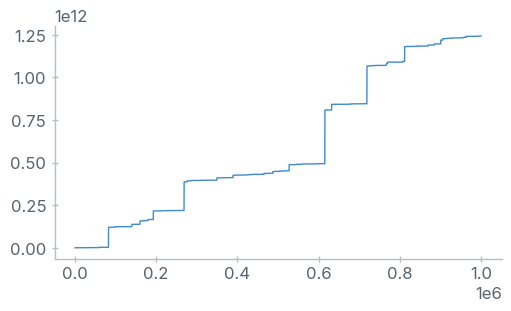

In [21]:
flight = np.asarray(levy.rvs(size=10**6, loc=0, scale=1.666667)).cumsum()
f, ax = plt.subplots(figsize=(5, 3), layout="constrained")
ax.plot(flight)
plt.show()

In [22]:
dea_loader = DeaLoader()
dea_loader.data = flight

In [ ]:
dea_engine = DeaEngine(dea_loader, theta=0.5, window_stop=0.9, windows=500)
dea_engine.analyze_with_stripes(fit_start=0.8, fit_stop=0.999, stripes=60)

Output()

 δ         μ (rule 1)   μ (rule 2)   μ (rule 3)  
 ──────────────────────────────────────────────── 
  1.01856   2.01856      1.98177      0.98144

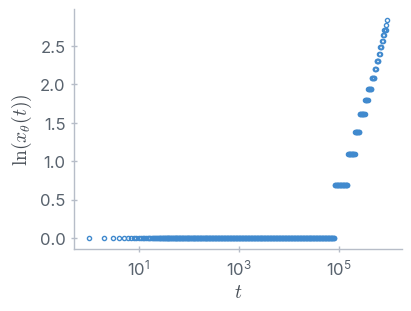

In [28]:
x_line = np.linspace(start=1, stop=np.max(dea_engine.window_lengths), num=3)
fig, ax = plt.subplots(figsize=(4, 3), layout="constrained")
ax.plot(
    dea_engine.window_lengths,
    dea_engine.entropies,
    linestyle="none",
    marker="o",
    markersize=3,
    fillstyle="none",
)
ax.set_xscale("log")
ax.set_xlabel("$t$")
ax.set_ylabel("$\\ln(x_\\theta(t))$")
plt.show()

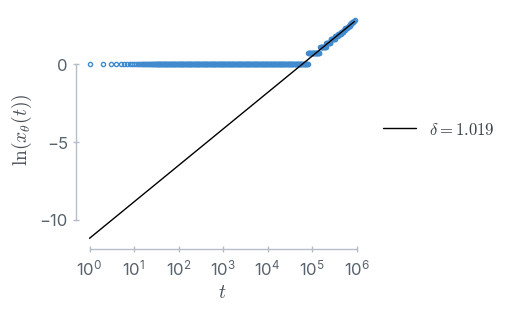

In [29]:
dea_plot = DeaPlotter(dea_engine)
dea_plot.s_vs_l()
plt.show()